In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

df = pd.read_csv('./house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In Linear regression, our X or Independent or predictor variables are correlated with response but not with eachother

In our example, the area, #bedrooms, #bathrooms are all correlated to one another

We can check this relation using seaborn

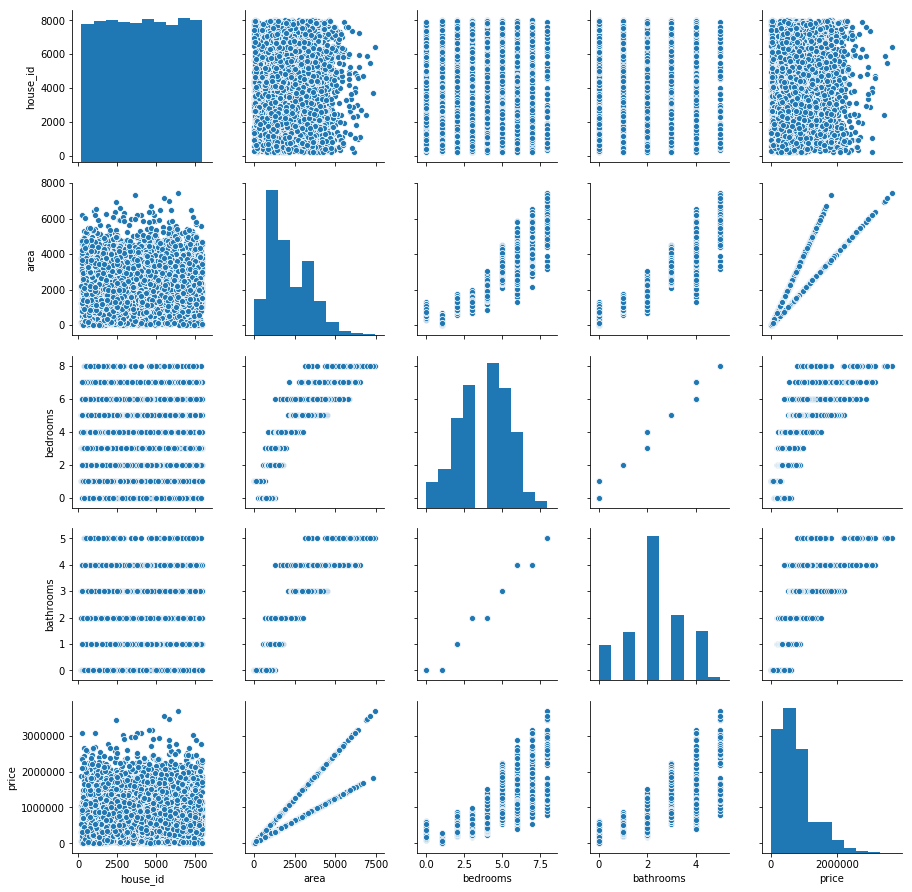

In [17]:

sb.pairplot(df) #this will show relationship between all variables

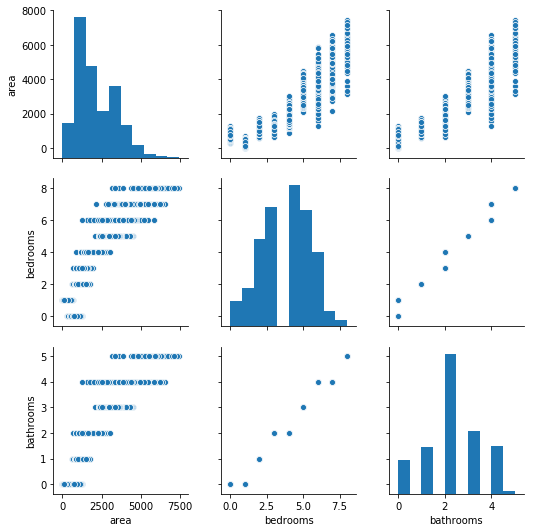

In [18]:
sb.pairplot(df[['area', 'bedrooms', 'bathrooms']])

## Above plot show all these variables have a positive relation

In [21]:
#implementing MLR on these variables

df['intercept'] = 1

lm = sm.OLS(df['price'], df[['intercept', 'area', 'bedrooms', 'bathrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Sun, 10 Feb 2019   Prob (F-statistic):               0.00
Time:                        06:14:31   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Since all the 3 variables area bedroom and bathroom have positive relation 
## So you expect these 3 to have same relation with the response i.e. price. As they increase even price should increase
## But in out results, bedrooms has -ve coefficient associated with it
## Even though price and bedroom have positive relationship with one another in MLR model it showed negative
## This is the side effect of having multicollinearity in the model

## Another way to identify for predictores are correlated is by using Variance Inflation Factors (VIF)

In [25]:
#Using statsmodel we can calculate VIFs for each X variable like this
vif = pd.DataFrame()

y, X = dmatrices('price ~ intercept + area + bedrooms + bathrooms', df, return_type='dataframe') #creating equation for X and y
#will give matrices that we have passed through VIF function that we read from statsmodel in below line

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)
#remove atleast one predictor variable from bedrooms and bathrooms as both of their VIF factor are larger than 10 

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,0.0,Intercept
1,0.0,intercept
2,5.5,area
3,20.9,bedrooms
4,19.0,bathrooms


In [27]:
#removing bathrooms from MLR

lm = sm.OLS(df['price'], df[['intercept', 'area', 'bedrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6345.
Date:                Sun, 10 Feb 2019   Prob (F-statistic):               0.00
Time:                        06:22:47   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7857.4509   9425.288      0.834      0.405   -1.06e+04    2.63e+04
area         346.4458      7.152     48.443      0.000     332.426     360.466
bedrooms    1626.8306   5191.702      0.313      0.754   -8550.763    1.18e+04
==============================================================================
Omnibus:                      368.146   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.224
Skew:                           0.535   Prob(JB):                     8.91e-77
Kurtosis:                       2.502   Cond. No.                     6.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#creating VIF without bathrooms
y, X = dmatrices('price ~ area + bedrooms', df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 

vif.round(1)



,VIF Factor,features
0,6.1,Intercept
1,5.3,area
2,5.3,bedrooms
